# Mask R-CNN - Test on COCO Dataset

Run the Mask R-CNN net in inference mode, with the additional PCILayer that generates the context-based tensor 

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys,os, pprint
pp = pprint.PrettyPrinter(indent=2, width=100)
print('Current working dir: ', os.getcwd())
pp.pprint(sys.path)
if '..' not in sys.path:
    print("appending '..' to sys.path")
    sys.path.append('..')
    
import numpy as np
import mrcnn.utils     as utils
import mrcnn.visualize as visualize
from mrcnn.prep_notebook import build_mrcnn_inference_pipeline, get_inference_batch, get_image_batch, run_mrcnn_detection
from mrcnn.coco          import prep_coco_dataset

input_parms  =" --batch_size     1  "
input_parms +=" --mrcnn_logs_dir train_mrcnn_coco_subset "
# input_parms +=" --fcn_logs_dir   train_fcn8_subset " 
input_parms +=" --mrcnn_model    last "
input_parms +=" --sysout         screen "
input_parms +=" --coco_classes   78 79 80 81 82 44 46 47 48 49 50 51 34 35 36 37 38 39 40 41 42 43 10 11 13 14 15 "

parser = utils.command_line_parser()
args = parser.parse_args(input_parms.split())

Current working dir:  E:\git_projs\MRCNN3\notebooks
[ '',
  'D:\\Program Files\\Anaconda3\\envs\\TF\\python35.zip',
  'D:\\Program Files\\Anaconda3\\envs\\TF\\DLLs',
  'D:\\Program Files\\Anaconda3\\envs\\TF\\lib',
  'D:\\Program Files\\Anaconda3\\envs\\TF',
  'D:\\Program Files\\Anaconda3\\envs\\TF\\lib\\site-packages',
  'e:\\git_projs\\cocoapi\\pythonapi',
  'D:\\Program Files\\Anaconda3\\envs\\TF\\lib\\site-packages\\IPython\\extensions',
  'C:\\Users\\Kevin.Bardool\\.ipython']
appending '..' to sys.path


Using TensorFlow backend.


## Detection Pipeline (build model and load weights)

In [2]:
pp.pprint(sys.path)

[ '',
  'D:\\Program Files\\Anaconda3\\envs\\TF\\python35.zip',
  'D:\\Program Files\\Anaconda3\\envs\\TF\\DLLs',
  'D:\\Program Files\\Anaconda3\\envs\\TF\\lib',
  'D:\\Program Files\\Anaconda3\\envs\\TF',
  'D:\\Program Files\\Anaconda3\\envs\\TF\\lib\\site-packages',
  'e:\\git_projs\\cocoapi\\pythonapi',
  'D:\\Program Files\\Anaconda3\\envs\\TF\\lib\\site-packages\\IPython\\extensions',
  'C:\\Users\\Kevin.Bardool\\.ipython',
  '..']


In [3]:
mrcnn_model = build_mrcnn_inference_pipeline(args = args)
# mrcnn_model.config.display()
# mrcnn_model.config.TRAINING_DIR = 'train_mrcnn_coco_subset'
# mrcnn_model.config.TRAINING_PATH = 'F:\\models\\train_mrcnn_coco_subset'
# mrcnn_model.model_dir = mrcnn_model.config.TRAINING_PATH
# print(mrcnn_model.config.TRAINING_PATH, mrcnn_model.model_dir)
# mrcnn_model.load_model_weights(init_with = 'last',verbose = 1)  


--> Execution started at: 12-19-2018 @ 20:12:17
    Tensorflow Version: 1.8.0   Keras Version : 2.2.0 

Arguments passed :
--------------------
batch_size                     1
coco_classes                   [78, 79, 80, 81, 82, 44, 46, 47, 48, 49, 50, 51, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 10, 11, 13, 14, 15]
epochs                         1
fcn_arch                       FCN32
fcn_layers                     fcn32+
fcn_logs_dir                   train_fcn
fcn_losses                     fcn_BCE_loss
fcn_model                      last
last_epoch                     0
lr                             0.001
mrcnn_exclude_layers           None
mrcnn_layers                   mrcnn fpn rpn 
mrcnn_logs_dir                 train_mrcnn_coco_subset
mrcnn_model                    last
new_log_folder                 False
opt                            ADAGRAD
scale_factor                   4
steps_in_epoch                 1
sysout                         SCREEN
val_steps                     

### Build test datasets

In [4]:
##------------------------------------------------------------------------------------
## Build & Load Training and Validation datasets
##------------------------------------------------------------------------------------
print('load coco classes: ', args.coco_classes)
loadAnns='active_only'
# loadAnns='all_classes'
# dataset_test = prep_coco_dataset(['val'], mrcnn_model.config, generator = False , return_coco = True, active_class_ids=load_class_ids)
# dataset_test = prep_coco_dataset(["train", "val35k"], mrcnn_model.config, generator = False , return_coco = True, load_coco_classes=args.coco_classes)
dataset_test   = prep_coco_dataset(["minival"], mrcnn_model.config, generator = False , return_coco = False,load_coco_classes=args.coco_classes, loadAnns=loadAnns)
class_names = dataset_test.class_names

load coco classes:  [78, 79, 80, 81, 82, 44, 46, 47, 48, 49, 50, 51, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 10, 11, 13, 14, 15]
!!! Loading annotations for ACTIVE CLASSES ONLY !!!
COCO loading annotations file F:\MLDatasets\coco2014\annotations/instances_minival2014.json  into memory...
Done (t=1.13s)
creating index...
index created!
 load subset of classes:  [78, 79, 80, 81, 82, 44, 46, 47, 48, 49, 50, 51, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 10, 11, 13, 14, 15]
 image dir            :  F:\MLDatasets\coco2014\val2014
 json_path_dir        :  F:\MLDatasets\coco2014\annotations/instances_minival2014.json
 number of images     :  2416
 image_ids[:10]       :  [532481, 385029, 311303, 393226, 532493, 458768, 327701, 434204, 24610, 344100]
 image_ids[1000:1010] :  [527695, 322895, 175438, 314709, 109916, 355677, 273760, 216419, 52591, 290163]
Prepares complete


In [ ]:
# print(len(dataset_test.image_ids), len(dataset_test.image_info))
# dataset_test.display_active_class_info()
# class_names = dataset_test.class_names

##  Run detection pipeline on random image

#### `get_inference_batch()`

 Image_id    :  625  Reference:  http://cocodataset.org/#explore?id=2157 Coco Id: 2157
 Image meta  :  [       625        427        640          3        170          0        853       1024          1          1]
 Class ids   :  (14,)    [        44         44         41         41         41         41         41         41         41         41         41         42         42         44]
 Class Names :  ['knife', 'knife', 'wine glass', 'wine glass', 'wine glass', 'wine glass', 'wine glass', 'wine glass', 'wine glass', 'wine glass', 'wine glass', 'cup', 'cup', 'knife']


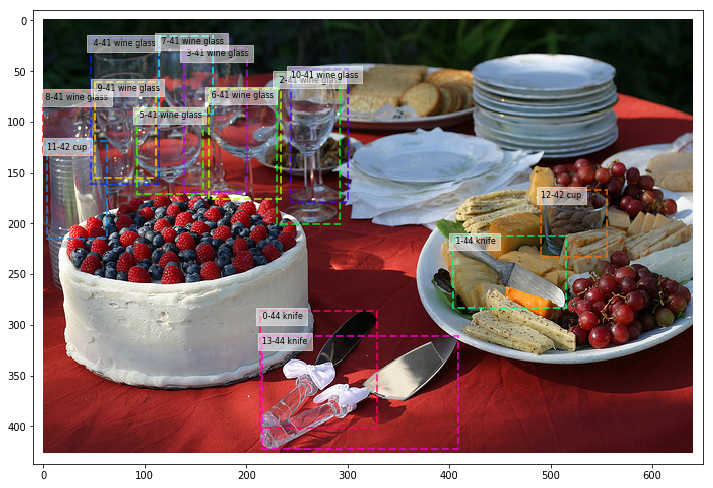

In [32]:
from mrcnn.prep_notebook import get_image_batch, get_inference_batch
image_id = 625 ## 1927, 4737
# images = get_image_batch(dataset_test, 1927, display=True)
visualize.display_image_gt(dataset_test, mrcnn_model.config, image_ids = image_id)
# batch_x = get_inference_batch(dataset_test, mrcnn_model.config, image_ids=1927, display=True)

In [33]:
# from mrcnn.prep_notebook import 
results = run_mrcnn_detection(mrcnn_model,dataset_test, image_ids= image_id, verbose = 0)
r = results[0]

In [34]:
print('Length of results from MRCNN detect: ', len(results))
# r = results[0]
print('mrcnn_results keys: ')
print('--------------------')
for i in sorted(r.keys()):
    print('   {:.<25s}  {}'.format(i , r[i].shape))        
print()

Length of results from MRCNN detect:  1
mrcnn_results keys: 
--------------------
   class_ids................  (32,)
   detection_ind............  (32,)
   detections...............  (200, 7)
   gt_bboxes................  (14, 4)
   gt_class_ids.............  (14,)
   image....................  (427, 640, 3)
   image_meta...............  (89,)
   molded_image.............  (1024, 1024, 3)
   molded_rois..............  (32, 4)
   orig_image_meta..........  (89,)
   pr_hm....................  (256, 256, 81)
   pr_hm_scores.............  (81, 200, 24)
   pr_scores................  (32, 24)
   pr_scores_by_class.......  (81, 200, 24)
   rois.....................  (32, 4)
   scores...................  (32,)



gt_class_id : (14,)
gt_bbox     : (14, 4)
Image Meta: [ 625  427  640    3  170    0  853 1024    1    1]
 Image_id    :  625  Reference:  http://cocodataset.org/#explore?id=2157 Coco Id: 2157
 Image meta  :  [ 625  427  640    3  170    0  853 1024    1    1]
 Class ids   :  (14,)    [44 44 41 41 41 41 41 41 41 41 41 42 42 44]
 Class Names :  ['knife', 'knife', 'wine glass', 'wine glass', 'wine glass', 'wine glass', 'wine glass', 'wine glass', 'wine glass', 'wine glass', 'wine glass', 'cup', 'cup', 'knife']


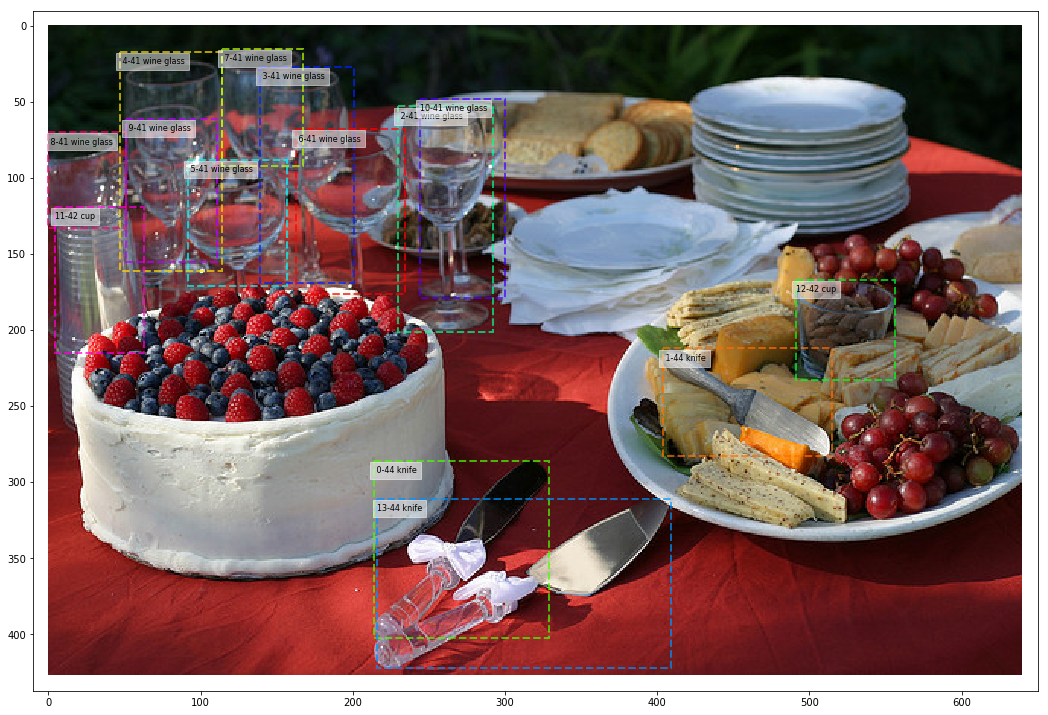

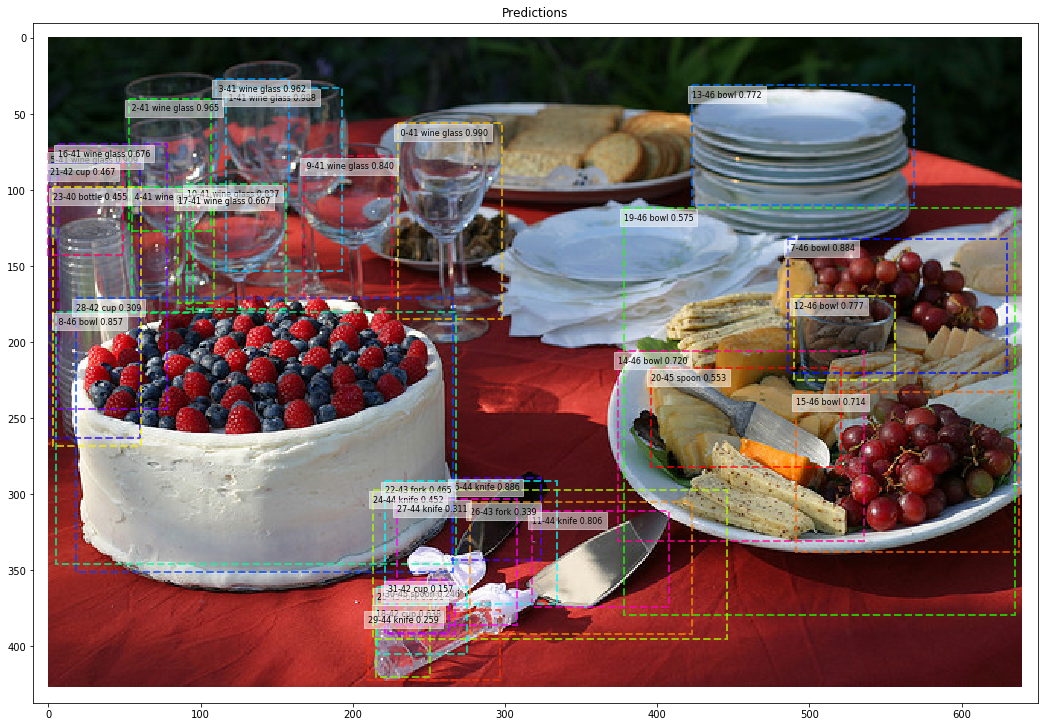

In [35]:
from mrcnn.utils import log # Display results
r = results[0]
print("gt_class_id :", r['gt_class_ids'].shape)
print("gt_bbox     :", r['gt_bboxes'].shape)
print('Image Meta:', r['orig_image_meta'][:10])
visualize.display_image_gt(dataset_test, mrcnn_model.config, image_id, size = 18)
visualize.display_instances(r['image'], r['rois'],  r['class_ids'], dataset_test.class_names, r['scores'], title="Predictions", size = 18)

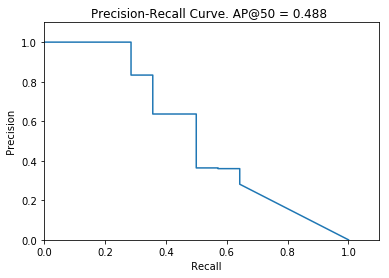

In [36]:
# Draw precision-recall curve
AP, precisions, recalls, overlaps = utils.compute_ap(r['gt_bboxes'], r['gt_class_ids'], r['molded_rois'], r['class_ids'], r['scores'])
visualize.plot_precision_recall(AP, precisions, recalls)

In [37]:
print(precisions)
print(recalls)

[1.0000 1.0000 1.0000 1.0000 1.0000 0.8333 0.8333 0.7143 0.6364 0.6364 0.6364 0.6364 0.5833 0.5385
 0.5000 0.4667 0.4375 0.4118 0.3889 0.3684 0.3636 0.3636 0.3636 0.3600 0.3600 0.3600 0.3462 0.3333
 0.3214 0.3103 0.3000 0.2903 0.2812 0.0000]
[0.0000 0.0714 0.1429 0.2143 0.2857 0.2857 0.3571 0.3571 0.3571 0.3571 0.4286 0.5000 0.5000 0.5000
 0.5000 0.5000 0.5000 0.5000 0.5000 0.5000 0.5000 0.5000 0.5714 0.5714 0.5714 0.6429 0.6429 0.6429
 0.6429 0.6429 0.6429 0.6429 0.6429 1.0000]


In [38]:
np_format = {}
float_formatter = lambda x: "%10.4f" % x
int_formatter   = lambda x: "%10d" % x
np_format['float'] = float_formatter
np_format['int']   = int_formatter
np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)

In [39]:
r = results[0]
print('ground truth')
print(r['gt_bboxes'])
print(r['gt_class_ids'])
print(r['class_ids'])
print('rois:')
print(r['rois'])
print(r['class_ids'].dtype)
print('molded rois:')
print(r['molded_rois'])
print('scores:', r['scores'])
# print(' pr_scores:',r['pr_scores'].shape)
# print(' pr_hm_scores:',r['pr_hm_scores'].shape)
# print(' pr_scores_by class ', r['pr_scores_by_class'].shape)
# print(dataset_val.class_ids)
# print(dataset_val.class_info)

ground truth
[[       628        342        813        526]
 [       509        646        623        824]
 [       255        368        491        467]
 [       213        222        440        321]
 [       197         75        427        182]
 [       311        147        443        251]
 [       279        261        451        374]
 [       194        182        317        267]
 [       282          0        383         81]
 [       267         81        418        177]
 [       247        390        456        480]
 [       360          6        514        101]
 [       437        786        543        890]
 [       668        346        845        654]]
[        44         44         41         41         41         41         41         41         41         41         41         42         42         44]
[        41         41         41         41         41         41         44         46         46         41         41         44         46         46         46       

--------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                           alt score 0                     alt score 1                              alt score 2                
        class                   mrcnn   normlzd    gaussian    bbox   nrm.scr*     ga.sum     mask    score    norm         ga.sum    mask   score   norm     
seq  id     name                score    score       sum       area   gau.sum      in mask    sum             score        in mask    sum            score    
--------------------------------------------------------------------------------------------------------------------------------------------------------------
  0  41 wine glass             0.9901   1.0000     0.9998  1409.3750  0.9998      60.9588    88.0000   0.6927   0.9930     60.9588    88.0000   0.6927   0.9930       264.00   120.50
  1  41 wine glass    

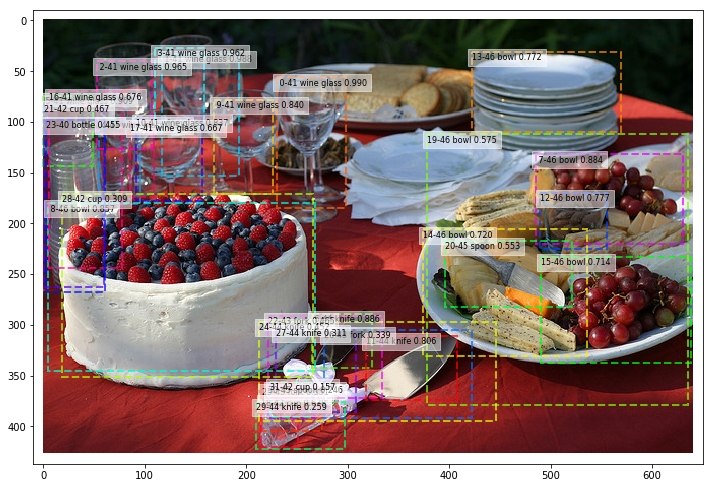

In [40]:
visualize.display_mrcnn_scores(r, class_names)

In [41]:
from mrcnn.datagen import load_image_gt
_, image_meta, gt_class_ids, gt_bboxes =  load_image_gt(dataset_test, mrcnn_model.config, image_id, use_mini_mask=False)

In [42]:
print(gt_class_ids)
print(r['gt_class_ids'])
print(gt_bboxes)
print(r['gt_bboxes'])

[        44         44         41         41         41         41         41         41         41         41         41         42         42         44]
[        44         44         41         41         41         41         41         41         41         41         41         42         42         44]
[[       628        342        813        526]
 [       509        646        623        824]
 [       255        368        491        467]
 [       213        222        440        321]
 [       197         75        427        182]
 [       311        147        443        251]
 [       279        261        451        374]
 [       194        182        317        267]
 [       282          0        383         81]
 [       267         81        418        177]
 [       247        390        456        480]
 [       360          6        514        101]
 [       437        786        543        890]
 [       668        346        845        654]]
[[       628        342      

# Build `predicted_classes` , `ground_truth_bboxes`, and `predicted_bboxes` dictionaries

In [ ]:
from mrcnn.datagen import load_image_gt

predicted_classes = []
ground_truth_bboxes = {}
predicted_bboxes    = {}
for a,b in zip(dataset_val.class_ids, dataset_val.class_names):
    predicted_classes.append({'id'   : int(a),
                         'name' : b,
                         'scores': [],
                         'bboxes': []})


####  Populate dictionaries with results from mrcnn model `detect()`

In [ ]:
    
for image_id in range(2):
    print('image id :', image_id)
    image = dataset_test.load_image(image_id)
    _, image_meta, gt_class_ids, gt_bboxes =\
            load_image_gt(dataset_test, mrcnn_model.config, image_id, use_mini_mask=False)

    results = mrcnn_model.detect([image], verbose= 0)
    r = results[0]    
    
#     print(' Length of results from MRCNN detect: ', len(results))
#     r['orig_image_meta'] = image_meta
#     r['gt_bboxes']       = gt_bbox
#     r['gt_class_ids']    = gt_class_id
#     print('mrcnn_results keys: ')
#     print('--------------------')
#     for i in sorted(r.keys()):
#         print('   {:.<25s}  {}'.format(i , r[i].shape))        
#     print()
    keyname = os.path.split(dataset_test.image_info[image_id]['path'])[1]
     
    ground_truth_bboxes[keyname] = {"boxes" : gt_bboxes.tolist(),
                                    "class_ids" : gt_class_ids.tolist()}
    
    predicted_bboxes[keyname] =  {"boxes" : r['molded_rois'].tolist(),
                                    "scores" : r['scores'].tolist(),
                                    "class_ids" : r['class_ids'].tolist()}
    print()
    for cls, bbox in zip(gt_class_ids,gt_bboxes.tolist()):
        print(cls, bbox)
    for cls, score, bbox in zip(r['class_ids'], r['scores'], r['molded_rois'].tolist()):
        predicted_classes[cls]['scores'].append(float(score))
        predicted_classes[cls]['bboxes'].append(bbox)
        print(cls, bbox, score)

In [ ]:
def update_ap_dictionaries(results, gt_bboxes, pr_bboxes, pr_classes):
    for r in results:
        

In [ ]:
# pp.pprint(predicted_bboxes)
# pp.pprint(ground_truth_bboxes)
# pp.pprint(predicted_classes)

####  Add average and percentile info to predicted class statistics

In [ ]:
for cls in predicted_classes:
    if (len(cls['scores']) == 0 ):
        cls['avg'] = 0.0000
        cls['percentiles'] = [0.0000, 0.0000, 0.0000] 
    else:
        cls['avg'] = np.round(np.mean(predicted_classes[i]['scores']),4)
        cls['percentiles'] = np.round(np.percentile(predicted_classes[i]['scores'],(25,50,75)),4).tolist()

####  Write to json and pickle files

In [ ]:
with open('predicted_classes_info.txt', 'w') as outfile:
    json.dump(predicted_classes, outfile)
with open('ground_truth_bboxes.txt', 'w') as outfile:
    json.dump(ground_truth_bboxes, outfile)
with open('predicted_bboxes.txt', 'w') as outfile:
    json.dump(predicted_bboxes, outfile)    

import pickle
with open('predicted_classes_info.pkl', 'wb') as outfile:
    pickle.dump(predicted_classes, outfile)
    
with open('ground_truth_bboxes.pkl', 'wb') as outfile:
    pickle.dump(ground_truth_bboxes, outfile)
    
with open('predicted_bboxes.pkl', 'wb') as outfile:
    pickle.dump(predicted_bboxes, outfile)

####  read from json and pickle files

In [ ]:
with open("gt_info.txt", 'r') as infile:
    load_gt_info = json.load(infile)
with open("predict_info.txt", 'r') as infile:
    load_predict_info = json.load(infile)

print(type(load_gt_info), type(load_predict_info))    
# pp.pprint(load_gt_info)
pp.pprint(load_predict_info)

#  Print some information about the model 

In [ ]:
# for layer in model.keras_model.layers
#     print layer.name 

layers    = [layer for layer in mrcnn_model.keras_model.layers]          # all layer outputs
print(len(layers))

for idx in range(200, len(layers)):
    print( ' layer: {} name: {}'.format(idx, layers[idx].name))
#     print(' layer {} :  {}'.format(idx,layers[idx]))
#     print(' Number of inbound nodes: ', end ='')
#     pp.pprint(len(layers[idx]._inbound_nodes))
#     pp.pprint(layers[idx].__dict__)
#     print('-------------------------------------------')
print('idx : ', idx)
pp.pprint(layers[idx].__dict__)

print()
pp.pprint(layers[idx]._inbound_nodes[0].__dict__)

####  Print Layer & Weight Info

In [ ]:
# keras_model = mrcnn_model.keras_model
# layers = keras_model.inner_model.layers if hasattr(keras_model, "inner_model") else keras_model.layers
# print(dir(layers[0]))
# pp.pprint(layers[7].weights)
print()
for i in range(len(layers)):
    print('\n{:3d} {:20s} Weights: {}'.format(i, layers[i].name, len(layers[i].weights))) ## [weight.name for weight in layers[i].weights]))
    print('{:23s}  Trainable: {} '.format(' ',[weight.name for weight in layers[i].trainable_weights]))
    for weight in layers[i].weights:
        print('{:25s} {:30s} {}  '.format(' ',weight.name,  weight.shape))

####  More layer information

In [ ]:
import pprint
pp = pprint.PrettyPrinter(indent=2, width=100)
np.set_printoptions(linewidth=100,precision=4,threshold=1000, suppress = True)

# model.compile_only(learning_rate=config.LEARNING_RATE, layers='heads')
# print('\n Metrics (_get_deduped_metrics_names():) ') 
# pp.pprint(mm._get_deduped_metrics_names())
# print('\n Losses (model.metrics_names): ') 
# pp.pprint(mm.metrics_names)
# KB.set_learning_phase(0)
# print(' Learning phase values is L ' ,KB.learning_phase())
# print('\Layers ', len(mrcnn_model.keras_model.layers))
# pp.pprint(mrcnn_model.keras_model.layers)

print('\n Weights: ') 
## Get weieights acturally returns weight dims
# print(' Number of weights arrays: ',len(mrcnn_model.keras_model.get_weights()))
print(' length of model.keras_model.weights', len(mrcnn_model.keras_model.weights))
# for i,j in enumerate(mrcnn_model.keras_model.weights):
#     print(i, j) # j.name, j.shape, j.dtype)
# pp.pprint(mrcnn_model.keras_model.weights)
# pp.pprint(type(mrcnn_model.keras_model.get_weights()))

# pp.pprint(dir(model.keras_model))
# print(mrcnn_model.keras_model.weights[1])

#### Loaded dataset information

In [ ]:
print("Testing Dataset Image Count: {}".format(len(dataset_test.image_ids)))
print("Testing Dataset Class Count: {}".format(dataset_test.num_classes))
# for i, info in enumerate(dataset_test.class_info):
#     print("{:3}. {:50}".format(i, info['name']))

#### List trainable layers using `get_trainable_layers()`

In [ ]:
for i in  mrcnn_model.get_trainable_layers():
    print(' Layer:', i.name)       

####  Get a list of trainable layers, i.e., layers that have weights

In [ ]:
# trainable = mrcnn_model.get_trainable_layers()
layers    = [layer for layer in mrcnn_model.keras_model.layers]          # all layer outputs
print('Trn  Idx   Layer Name   \t\t InputNode LayerNames \t\t InputNode LayerShapes')
for idx, layer in enumerate(layers):
    TrnFlg = 'T' if layer.get_weights() else ' '
    all_input_shapes = [node.input_shapes   for node in layer._inbound_nodes][0]
    input_nodes  = [node for node in layer._inbound_nodes]
    all_nodes_layers  = [node.inbound_layers for node in input_nodes]   
#     print(all_input_nodes)
#     all_nodes_layers  = [[node.inbound_layers for node in input_nodes]  for input_nodes in layer._inbound_nodes]  #[node for node in all_input_nodes]]]
    all_input_layer_names = [[layer.name for layer in node_layers] for node_layers in all_nodes_layers][0]        
    str_names = ','.join(map(str, all_input_layer_names)) 
    str_shapes = ','.join(map(str, all_input_shapes)) 
    print(' {} ; {:3d} ; {:25s}; {:30s}; {:30s} '.format( TrnFlg, idx, layer.name,  str_names, str_shapes))

In [ ]:
print()    
for i in range(194,len(layers)):
# for i in [206]:
    layer = layers[i]
    print('====================================================='.format(i))
    print('== Layer {} : {} '.format(i,layer.name))
    print('====================================================='.format(i))
    pp.pprint(layer.__dict__)
    print()
    for j,node in enumerate(layer._inbound_nodes):
        print('== Inbound Node {} ========================================='.format(j))
        print(type(node))
        pp.pprint(node.__dict__)
        node_inlayers_names = [n.name for n in node.inbound_layers]
        print(node_inlayers_names)

# Run Object Detection

###  Test on loaded image

In [ ]:
# run_opts = tf.RunOptions(report_tensor_allocations_upon_oom = True)
# # print(type(run_opts))
# print(dir(run_opts))
# dct = {"options":  run_opts}
# print(dct)
# setattr(mrcnn_model.keras_model, '_function_kwargs', {})
# print(getattr(mrcnn_model.keras_model, '_function_kwargs',{}))

In [ ]:
results = mrcnn_model.detect([image], verbose=1)

In [ ]:
r = results[0]
for bbox, cls, scr in zip(r['rois'], r['class_ids'],  r['scores']):
    print('{}    {:2d}    {:.<20s}  {:5.4f} '.format(bbox,cls,dataset_test.class_names[cls], scr))
visualize.display_instances(image, r['rois'], r['class_ids'], 
                            dataset_test.class_names, r['scores'], ax=visualize.get_ax(size=16))

### Test on a random image from images folder

In [ ]:
# Load a random image from the images folder
# import mrcnn.visualize as visualize
import skimage.io
import matplotlib.pyplot as plt
IMAGE_DIR = '/home/kbardool/git_projs/mrcnn3/images'
# IMAGE_DIR = '/esat/tiger/joramas/mscStudentsData/kbardool/projs/mrcnn3/images'
file_names = next(os.walk(IMAGE_DIR))[2]
# print(file_names)
random_filename = random.choice(file_names)
print(random_filename)
image = skimage.io.imread(os.path.join(IMAGE_DIR, random_filename))
plt.figure(figsize=(11,11))
plt.imshow(image)

In [ ]:
# Run detection
results = mrcnn_model.detect([image], verbose=1)

In [ ]:
# Visualize results
r = results[0]
for bbox, cls, scr in zip(r['rois'], r['class_ids'],  r['scores']):
    print('{}    {:2d}    {:.<20s}  {:5.4f} '.format(bbox, cls, dataset_test.class_names[cls], scr))
    
visualize.display_instances(image, r['rois'], r['class_ids'], dataset_test.class_names, r['scores']) #, score_range=(0.21, 0.22))

###  Display random image from test dataset

In [ ]:
# Load random image and mask. ### 27711 persons and boats
image_id = np.random.choice(dataset_test.image_ids)
image    = dataset_test.load_image(image_id)
mask, class_ids = dataset_test.load_mask(image_id)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id ", image_id, dataset_test.image_reference(image_id))
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
print(class_ids.shape[0], bbox.shape[0])
# Display image and instances
# visualize.display_instances_with_mask(image, bbox, mask, class_ids, dataset_train.class_names)
visualize.display_instances(image, bbox, class_ids, dataset_test.class_names)

In [ ]:
results = mrcnn_model.detect([image], verbose=1)

In [ ]:
print('resutls :', results)
# Visualize results
r = results[0]
for bbox, cls, scr in zip(r['rois'], r['class_ids'],  r['scores']):
    print('{}    {:2d}    {:.<20s}  {:5.4f} '.format(bbox,cls,dataset_test.class_names[cls], scr))
visualize.display_instances(image, r['rois'], r['class_ids'], dataset_test.class_names, r['scores'])

### Test on a random image from test dataset

In [ ]:
# Test on a random image
# Validation dataset
# dataset_val = shapes.ShapesDataset()
# dataset_val.load_shapes(50, config.IMAGE_SHAPE[0], config.IMAGE_SHAPE[1])
# dataset_val.prepare()

image_id = random.choice(dataset_test.image_ids)
original_image, image_meta, gt_class_id, gt_bbox =\
    load_image_gt(dataset_test, mrcnn_config, image_id, use_mini_mask=False)
    

print('Image Id :', image_id)    
shape_list = dataset_test.image_info[image_id] 
pp.pprint(shape_list)
log("original_image", original_image)
log("image_meta", image_meta)
print(image_meta)
log("gt_class_id", gt_bbox)
log("gt_bbox", gt_bbox)
# log("gt_mask", gt_mask)

print(" 1: person   2: car  3: sun  4: building  5: tree  6: cloud ")
visualize.display_instances(original_image, gt_bbox, gt_class_id, 
                            dataset_test.class_names, figsize=(8, 8))

In [ ]:
results = model.detect([original_image], verbose=1)

In [ ]:
r = results[0]
print('  rois       : ', r['rois'])
print('  masks      : ', r['masks'].shape)
print('  class ids  : ', r['class_ids'])
print('  class names: ', dataset_test.class_names)
print('  scores     : ', r['scores'])
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                            dataset_test.class_names, r['scores'], ax=get_ax())

# Map Evaluation

In [ ]:
# Compute VOC-Style mAP @ IoU=0.5
# Running on 10 images. Increase for better accuracy.
from mrcnn.datagen     import data_generator, load_image_gt
import  mrcnn.utils as utils 

image_ids = np.random.choice(dataset_test.image_ids, 10)
APs = []
for image_id in image_ids:
    # Load image and ground truth data
    image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        load_image_gt(dataset_test, mrcnn_config,
                               image_id, use_mini_mask=False)
    molded_images = np.expand_dims(utils.mold_image(image, mrcnn_config), 0)
    # Run object detection
    results = mrcnn_model.detect([image], verbose=0)
    r = results[0]
    # Compute AP
    AP, precisions, recalls, overlaps =\
        utils.compute_ap(gt_bbox, gt_class_id,
                         r["rois"], r["class_ids"], r["scores"])
    APs.append(AP)
    
print("mAP: ", np.mean(APs))